In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

file = pd.read_csv("/Users/siegfriedhaaan/python_vsc/fortune_500/fortune500_1955_2013.txt")
file.to_csv("/Users/siegfriedhaaan/python_vsc/fortune_500/fortune500_1955_2013.csv")

In [2]:
file.columns = ['Year', 'Rank', 'Company', 'Revenue', 'Profit']

In [3]:
file

,Year,Rank,Company,Revenue,Profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
29995,2016,496,Telephone & Data Systems,5176,219
29996,2016,497,First American Financial,5176,288
29997,2016,498,NVR,5170,383
29998,2016,499,Cincinnati Financial,5142,634


In [4]:
file.dtypes

Year        int64
Rank        int64
Company    object
Revenue    object
Profit     object
dtype: object

Revenue and profit data types unexpectedly have objects within them. Will need to convert revenue and profit columns into floats

In [5]:
revenue_non_floats = file.Revenue.str.contains("[^0-9.-]")
print("Unique values: " + str(list(file.Revenue[revenue_non_floats])))
file.loc[revenue_non_floats]

Unique values: ['N.A.']


,Year,Rank,Company,Revenue,Profit
29003,2013,4,Phillips,N.A.,4124


In [6]:
profit_non_floats = file.Profit.str.contains("[^0-9.-]")
file.loc[profit_non_floats]

,Year,Rank,Company,Revenue,Profit
228,1955,229,Norton,135,N.A.
290,1955,291,Schlitz Brewing,100,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
27514,2010,15,General Motors,104589,N.A.
27741,2010,242,Lear,9739.6,N.A.
27831,2010,332,Charter Communications,6755,N.A.
28318,2011,319,Visteon,7466,N.A.


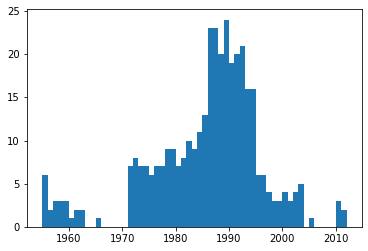

In [7]:
bin_sizes, _, _ = plt.hist(file.Year[profit_non_floats], bins = range(1955, 2013))

According to the histogram, the number of wrong formatted profits never exceed 25 in a single year

In a 58 year span, there are constantly 497 companies reporting their profit and revenue per year

There are 374 data points within those 30,000 entries, that have no reports for their profit

Therefore, removing those specific rows would result in a data loss of only about 1.2%

It should be safe to remove these rows

In [8]:
for index, row in file.iterrows(): 
    if row['Revenue'] == "N.A.":
        file.drop(index, axis = 0, inplace = True)
    if row['Profit'] == "N.A.":
        file.drop(index, axis = 0, inplace = True)

file['Revenue'] = pd.to_numeric(file['Revenue'],errors = 'raise')
file['Profit'] = pd.to_numeric(file['Profit'],errors = 'raise')


In [9]:
# Verifying the removal of row 29,003
file.tail(1000)

,Year,Rank,Company,Revenue,Profit
28999,2012,500,Molina Healthcare,4769.9,20.8
29000,2013,1,Wal-Mart Stores,469200.0,16999.0
29001,2013,2,Exxon Mobil,449900.0,44880.0
29002,2013,3,Chevron,233900.0,26179.0
29004,2013,5,Berkshire Hathaway,162500.0,14824.0
...,...,...,...,...,...
29995,2016,496,Telephone & Data Systems,5176.0,219.0
29996,2016,497,First American Financial,5176.0,288.0
29997,2016,498,NVR,5170.0,383.0
29998,2016,499,Cincinnati Financial,5142.0,634.0


In [10]:
file.dtypes

Year         int64
Rank         int64
Company     object
Revenue    float64
Profit     float64
dtype: object

Data's now cleaned up, time to model 

In [11]:
sns.set(style = "whitegrid")

# graph for average profits and revenues    
def mean_graph(x, y, ax, title, label):
    ax.set_title(title)
    ax.set_label(label)
    ax.plot(x, y)
    ax.margins(x = 0, y = 0)

In [12]:
grouping_year = file.loc[:, ['Year', 'Revenue', 'Profit']].groupby('Year')

In [13]:
average = grouping_year.mean()
x = average.index
y = average.Profit

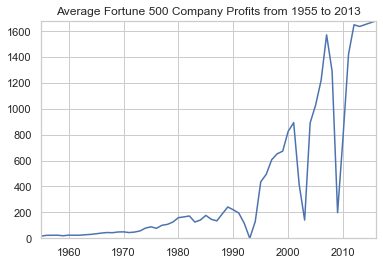

In [14]:
figure, ax = plt.subplots()
mean_graph(x, y, ax, 'Average Fortune 500 Company Profits from 1955 to 2013', 'Profit')

In [15]:
y_2 = average.Revenue

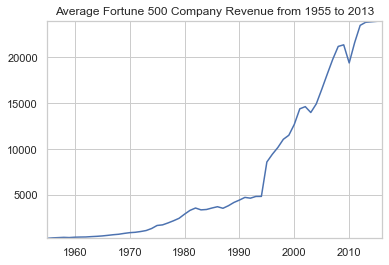

In [16]:
figure, ax = plt.subplots()
mean_graph(x, y_2, ax, 'Average Fortune 500 Company Revenue from 1955 to 2013', 'Revenue')

Revenue seems to be fairly stable in terms of growth. On the other hand, the huge dips in the profit graph seem to correspond to the early 1990's recession, the Dot-Com Bubble in the early 2000's, and the Great Recession in 2008. Public policies that are constructed in response to these dips, are clearly depicted by the rises in profit after the absolute minimum in any of the recessions. 

# Standard Deviation in mean profits from 1955 to 2013

<ErrorbarContainer object of 3 artists>

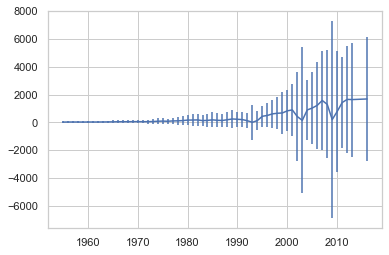

In [17]:
plt.errorbar(x, y, yerr = grouping_year.std().Profit)

# Standard Deviation in mean revenue from 1955 to 2013

<ErrorbarContainer object of 3 artists>

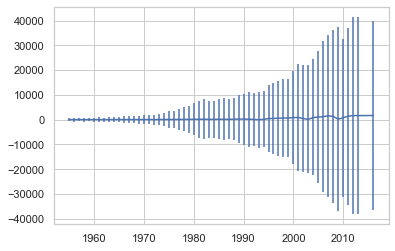

In [18]:
plt.errorbar(x, y, yerr = grouping_year.std().Revenue)

In the standard deviation graphs, we can see as overall revenues have increased, the disparity between company revenues has also increased. Due to a multitude of economic factors such as inflation and globalization, the disparity of profit and revenue for Fortune 500 companies has also skyrocketed. 